### Análisis de clusters por GMM

* Estudie el clasificador GMM desde las lecturas obligatorias de este módulo y use su implementación en Scikit-Learn.
* Utilizando visualizaciones y métricas adecuadas, compare los resultados de K-means y GMM. Comente las principales ventajas de GMM respecto de Kmeans

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler    # Normalizacion de datos 
from sklearn.decomposition import PCA               # analisis de componentes principales

* En este punto para efectos practicos, se procede de la misma manera anterior a la inspeccion de la base de datos.

In [2]:
km2 = pd.read_csv("kmeans2.csv")
km2.head()      # inspeccion de los datos

,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


* Se Elimina la columna _Unnamed:0_ que indica de la misma manera los index de la tabla 

In [3]:
km2 = km2.drop(["Unnamed: 0"], axis=1) 
km2.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


* Normalizacion de los datos con "fit_transform"
* Se observa que la base de datos contiene 5000 datos con 13 features

In [4]:
norm = StandardScaler()
k2_std = norm.fit_transform(km2)
k2_std.shape

(5000, 13)

* Se procede a una reduccion de dimensionalidad por PCA a 2 componentes 

In [5]:
pca = PCA(n_components=2)

k2_transformada = pca.fit_transform(k2_std)

k2_transformada = pd.DataFrame(k2_transformada, columns = ['K1', 'K2'])

* Se comprueba que la base de datos ahora solo contiene 2 features

In [6]:
k2_transformada.shape

(5000, 2)

> Representacion grafica de la base de datos

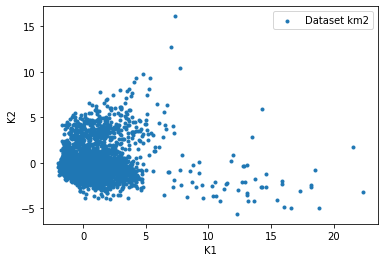

In [7]:
plt.scatter(k2_transformada.K1, k2_transformada.K2, marker=".")
plt.ylabel('K2')
plt.xlabel('K1')
plt.legend(["Dataset km2"])
plt.show()

* Se procede a analizar los datos transformados con reduccion de dimensionalidad para el metodo de **mezcla de gaussianas**

In [8]:
import seaborn as sns
from sklearn.mixture import GaussianMixture

from sklearn import metrics
import scipy.stats

* Se realiza un analisis Para determinar el número de gaussianas adecuadas usando los indicadores de ajuste el AIC (Akaike’s Information Criteria) y BIC (Bayesian Information Criteria).

In [19]:
n_componentes = np.arange(1,10)
modelos = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(k2_transformada)
           for n in n_componentes]

* La representacion grafica de este analisis es la siguiente:

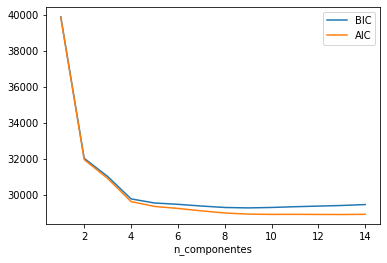

In [10]:
plt.plot(n_componentes, [m.bic(k2_transformada) for m in modelos], label = 'BIC')
plt.plot(n_componentes, [m.aic(k2_transformada) for m in modelos], label = 'AIC')
plt.legend(loc='best')
plt.xlabel('n_componentes')
plt.show()

> Del grafico anterior se puede observar que la mayor caida en los indicadores BIC y AIC es a partir de los 4 componentes, lo que conlleva a una conclusion similiar a la obtenida por KNN por el criterio del codo, en la que la cantidad de cluster para en analisis es de n=4.

* las "labels" descritas por el modelo se calculan bajo el metodo "GaussianMixture" con n_components=4 a los datos transformados segun la reduccion de dimensionalidad.

In [11]:
gmm = GaussianMixture(n_components=4).fit(k2_transformada)

labels = gmm.predict(k2_transformada)
labels

array([1, 0, 2, ..., 1, 1, 1], dtype=int64)

* Los centroides para el metodo GMM son los siguientes:
  + Se muestra un array con 4 componentes correspondientes a los cluster establecidos segun los criterios BIC y AIC

In [22]:
centers = np.empty(shape=(gmm.n_components, k2_transformada.shape[1]))
centers

array([[7.48619697, 1.23256836],
       [1.23256836, 2.67372266],
       [0.16913111, 0.01861831],
       [0.01861831, 0.19734697]])

* Los centroides calculados bajo el metodo KNN son :
    array([[-0.9705384 , -0.13405017],
       [ 1.86206921, -0.98067104],
       [ 1.58946626,  3.77383964],
       [12.8896012 , -2.04756778]])

* Los centroides no corresponden respectivamente a los clusters indicados, sin embargo, una comparacion visual indica que el cluster mas alejado (en este caso representado en el grafico por los puntos rojos) son relativamente similares. Esto es considerando que el metodo GMM toma los clusters encontrando las medias y matrices de covarianza de cada subpoblación y el metodo KNN tomando la distancia intracluster para la subpoblacion es de tener en cuenta que estos centros sean similares, pero no iguales, debido a GMM siendo un metodo no determinista.
* La forma más fácil de sobrellevar el metodo es ejecutar el procedimiento de ajuste varias veces y considerar el valor medio y la desviación estándar para cada configuración.

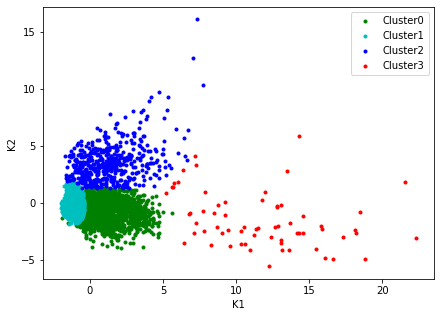

In [18]:
fig = plt.figure(figsize=(7,5))

colores = ["g", "c", "b", "r"]
for i in range(0,4):
    plt.plot(k2_transformada["K1"][labels == i], k2_transformada["K2"][labels == i], colores[i], label = "Cluster"+str(i), marker='.', linestyle='none')

plt.ylabel("K2")
plt.xlabel("K1")
plt.legend()
plt.show()

* La representacion grafica de la asignacion de clusters para esta poblacion es similar a la tomado por el metodo KNN, como se puede observar al comparar las graficas.